# 第三次计算物理作业

学号： 2021300002018

姓名： 朱向阳

# 3.5
对于简谐运动，运动方程的一般形式为
$$
\dfrac{\mathrm{d}^2x}{\mathrm{d}t^2} = -kx^{\alpha}
$$
其中 $\alpha=1$。这与 (3.2) 具有相同的形式，尽管变量名称不同。首先编写一个程序，使用 Euler-Cromer 方法根据 (3.9) 求解 $x$ 关于时间的函数，其中 $\alpha=1$（为了方便，可以取 $k=1$ ）。本节中描述的子程序可以修改以完成此任务。证明振动周期与运动的振幅无关。这是简谐运动的一个关键特征。然后将程序扩展到处理 $\alpha=3$ 的情况。这是一个非简谐振子的例子。计算几个不同振幅（在范围 0.2 到 1 内）下的振动周期，并证明现在运动的周期取决于振幅。给出一个直观的论证，解释为什么当振幅减小时周期变长。

In [38]:
data = {'pendulum1':{'x0':5, 'v0':0, 'k': 1, 'alpha': 1}}

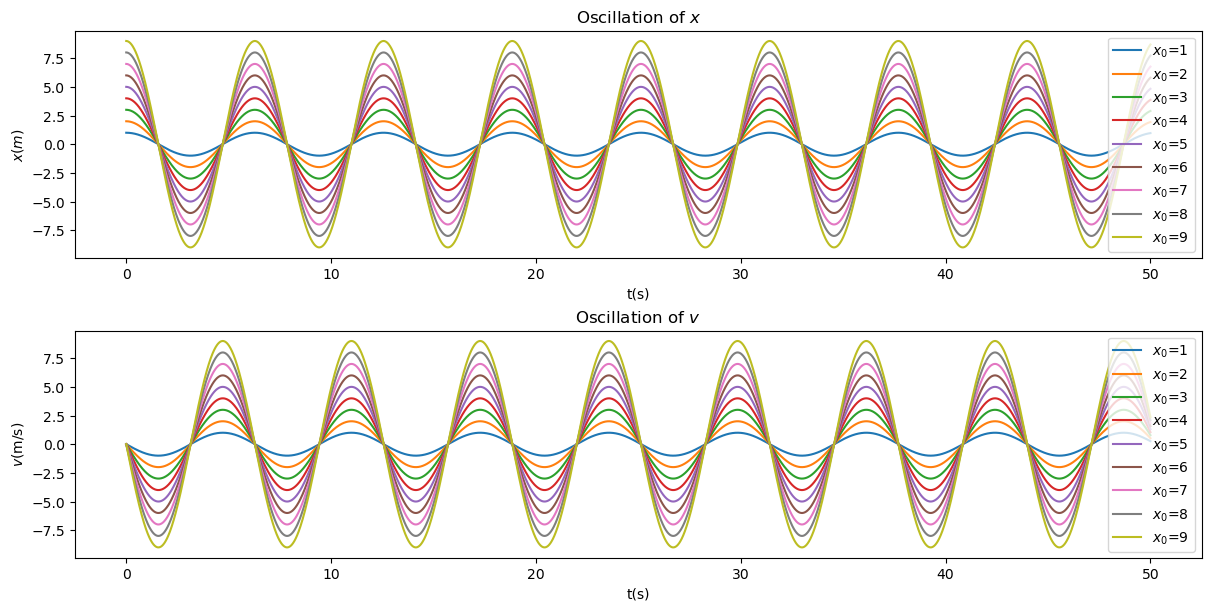

In [46]:
# Simulation of pendulum
import matplotlib.pyplot as plt
import numpy as np
import json

# declare contants
dt = 0.01
max_steps = 5000

# declare pendulum class
class Simple_Pendulum:
    def __init__(self, k=1, x0=0, v0=0):
        self.k = k
        self.x0 = x0
        self.v0 = v0
        self.x = np.zeros(max_steps + 1, dtype = np.float64)
        self.v = np.zeros(max_steps + 1, dtype = np.float64)
        self.t = np.zeros(max_steps + 1, dtype = np.float64)
        self.x[0] = self.x0
        self.v[0] = self.v0

    def calculate(self):
        for i in range(max_steps):
            self.x[i + 1], self.v[i + 1], self.t[i + 1] = self.move_one_step(self.x[i], self.v[i], self.t[i], self.k)

    def move_one_step(self, x, v, t, k):
        _x = x + v*dt
        _v = v - k*x*dt
        _t = t + dt
        return _x, _v, _t

    def get_results(self):
        return self.x, self.v, self.t

class Simple_Pendulum_with_Euler_Cromer(Simple_Pendulum):
    def __init__(self,k=1, x0=0, v0=0, alpha = 1):
        super().__init__()
        self.alpha = alpha
        self.k = k
        self.x0 = x0
        self.v0 = v0
        self.x[0] = self.x0
        self.v[0] = self.v0

    def move_one_step(self, x, v, t, k):
        _v = v - k*(x**self.alpha)*dt
        _x = x + _v*dt
        _t = t + dt
        return _x, _v, _t

def show_simple_pendulum_with_Euler_Cromer():
    fig, ax = plt.subplots(2, 1, layout='constrained', figsize=(12,6))
    for x in range(1, 10, 1):

        pendulum1 = Simple_Pendulum_with_Euler_Cromer(data['pendulum1']['k'],
                                    x,
                                    data['pendulum1']['v0'],
                                    data['pendulum1']['alpha'])
        pendulum1.calculate()
        theta, omega, t = pendulum1.get_results()
        ax[0].plot(t, theta, label=r'$x_0$={}'.format(x))
        ax[0].set(xlabel='t(s)', ylabel=r'$x(m)$')
        ax[0].legend()
        ax[0].set_title(r'Oscillation of $x$')
        ax[1].plot(t, omega, label=r'$x_0$={}'.format(x))
        ax[1].set(xlabel='t(s)', ylabel=r'$v$(m/s)')
        ax[1].legend()
        ax[1].set_title(r'Oscillation of $v$')
    plt.show()

show_simple_pendulum_with_Euler_Cromer()


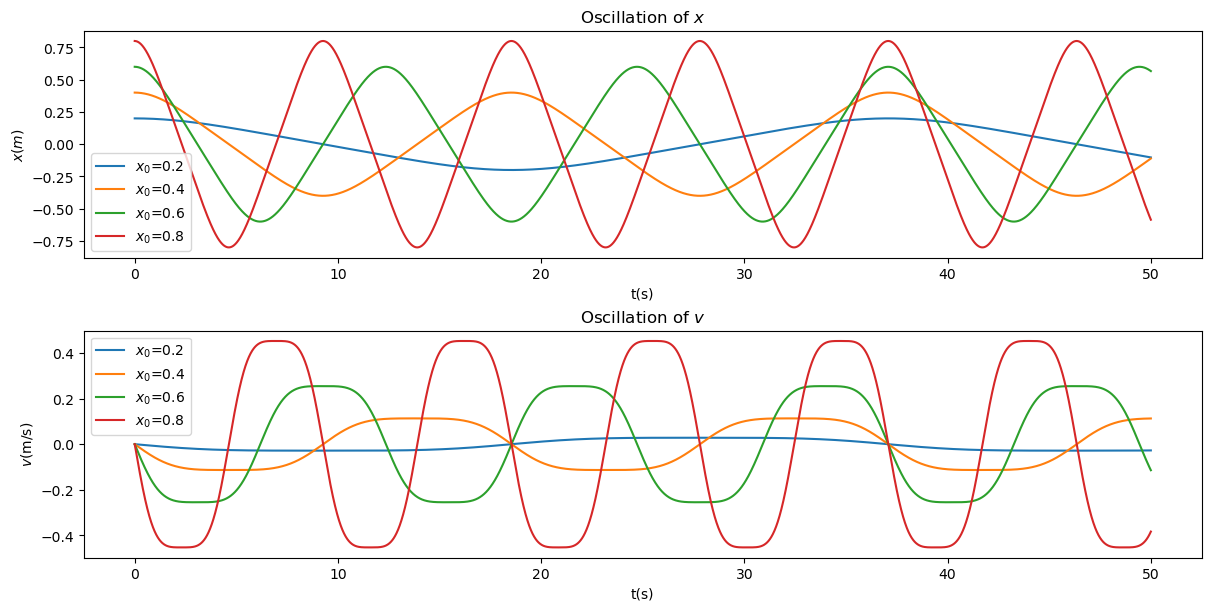

In [51]:
def show_simple_pendulum_with_Euler_Cromer():
    fig, ax = plt.subplots(2, 1, layout='constrained', figsize=(12,6))
    for x in range(2, 10, 2):
        x = x/10
        pendulum1 = Simple_Pendulum_with_Euler_Cromer(data['pendulum1']['k'],
                                    x,
                                    data['pendulum1']['v0'],
                                    3)
        pendulum1.calculate()
        theta, omega, t = pendulum1.get_results()
        ax[0].plot(t, theta, label=r'$x_0$={}'.format(x))
        ax[0].set(xlabel='t(s)', ylabel=r'$x(m)$')
        ax[0].legend()
        ax[0].set_title(r'Oscillation of $x$')
        ax[1].plot(t, omega, label=r'$x_0$={}'.format(x))
        ax[1].set(xlabel='t(s)', ylabel=r'$v$(m/s)')
        ax[1].legend()
        ax[1].set_title(r'Oscillation of $v$')
    plt.show()

show_simple_pendulum_with_Euler_Cromer()


## 直观解释
$$
\dfrac{\mathrm{d}^2x}{\mathrm{d}t^2} = -kx^{\alpha}
$$

当$\alpha > 1$时，
$$
\dfrac{\mathrm{d}^2x}{\mathrm{d}t^2} = -kx^{\alpha}
\\
v = \dfrac{\mathrm{d}x}{\mathrm{d}t} = -\dfrac{k}{\alpha - 1}x^{\alpha - 1}
$$
即$\left | v \right |$与$\left | x \right |$成正相关，回复速度取决于振幅大小，故当振幅减小时周期变长。

# 3.20. 
计算在$F_D=1.35$到1.5附近的摆的分叉图。制作一个放大的图（与图3.11相比），并得到Feigenbaum \delta参数的估计。

**实验表明，如果按照题意，求在外部驱动力周期在300-400个的结果，若想保证结果的准确度，dt至少要取到0.0001，且时间至少要到4000s.**

**经过实验，即使是使用cython计算，所需时间仍很不乐观，为了达到快速计算，本人另写了一份c语言代码进行运算，数据输出到csv文件中。C语言代码附在最后.**

In [3]:
data = {
   'pendulum1' : {
        'length' : 9.8,
        'theta0' : 0.314,
        'omega0' : 0
   },
   'pendulum2' : {
        'length' : 9.8,
        'theta0' : 0.314,
        'omega0' : 0,
        'q' : 2
   },
   'chaos_pendulum1' : {
        'length' : 9.8,
        'theta0' : 0.2,
        'omega0' : 0,
        'q' : 0.5,
        'F_D' : 0,
        'Omega_D' : 0.66667
   },
   'chaos_pendulum2' : {
        'length' : 9.8,
        'theta0' : 0.2,
        'omega0' : 0,
        'q' : 0.5,
        'F_D' : 0.5,
        'Omega_D' : 0.66667
   },
   'chaos_pendulum3' : {
        'length' : 9.8,
        'theta0' : 0.2,
        'omega0' : 0,
        'q' : 0.5,
        'F_D' : 1.49,
        'Omega_D' : 0.66667
   },
   'chaos_pendulum4' : {
        'length' : 9.8,
        'theta0' : 0.2,
        'omega0' : 0,
        'q' : 0.5,
        'F_Ds' : 1.35,
        'F_De' : 1.51,
        'Omega_D' : 0.66667
   },
   
}

In [41]:
%load_ext Cython

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import cython 
import pandas as pd

# 将所有使用cython计算的部分取消注释即可使用cython计算

# g = 9.8
# dt = 0.0001
# max_steps = 50000000

chos = 'chaos_pendulum4'
pendulum = data[chos]

# length = pendulum['length']

# q = pendulum['q']
FD = np.arange(pendulum['F_Ds'], pendulum['F_De'], 0.0001)
# OmegaD = pendulum['Omega_D']

# theta = np.zeros(max_steps + 1, dtype = np.float64)
# omega = np.zeros(max_steps + 1, dtype = np.float64)
# theta[0] = pendulum['theta0']
# omega[0] = pendulum['omega0']
# t = np.arange(0, dt * (max_steps + 1), dt)

# theta = np.tile(theta, (FD.size, 1))
# omega = np.tile(omega, (FD.size, 1))
# t = np.tile(t, (FD.size, 1))

# nsth = 300
# neth = 400
# period = (2 * np.pi) / OmegaD
# period_index = int(period/dt)
# times = (nsth - 1) * period
# timee = (neth - 1) * period
# sindex = int(times/dt)
# eindex = int(timee/dt) + 1


可以运行但是速度有点慢所以，暂不需要的cython：

In [50]:
# %%cython -3 

# import numpy as np
# cimport numpy as cnp
# cimport cython

# cnp.import_array()

# ctypedef cnp.float64_t DTYPE

# @cython.boundscheck(False) 
# @cython.wraparound(False) 

# cpdef cnp.ndarray[DTYPE, ndim=2] ci_py(int sindex, int eindex, int period_index, int max_steps, double length, double q, double OmegaD, double g, double dt, 
# cnp.ndarray[DTYPE, ndim=2] theta, cnp.ndarray[DTYPE, ndim=2] omega, cnp.ndarray[DTYPE, ndim=2] t, cnp.ndarray[DTYPE, ndim=1] FD):

#     for j in range(FD.size):
#         for i in range(max_steps):
#             omega[j][i + 1] = omega[j][i] - (g/length) * np.sin(theta[j][i]) * dt - q*omega[j][i]*dt + FD[j]*np.sin(OmegaD*t[j][i])*dt
#             theta[j][i + 1] = theta[j][i] + omega[j][i]*dt
    
#     return theta[:, sindex:eindex:period_index]

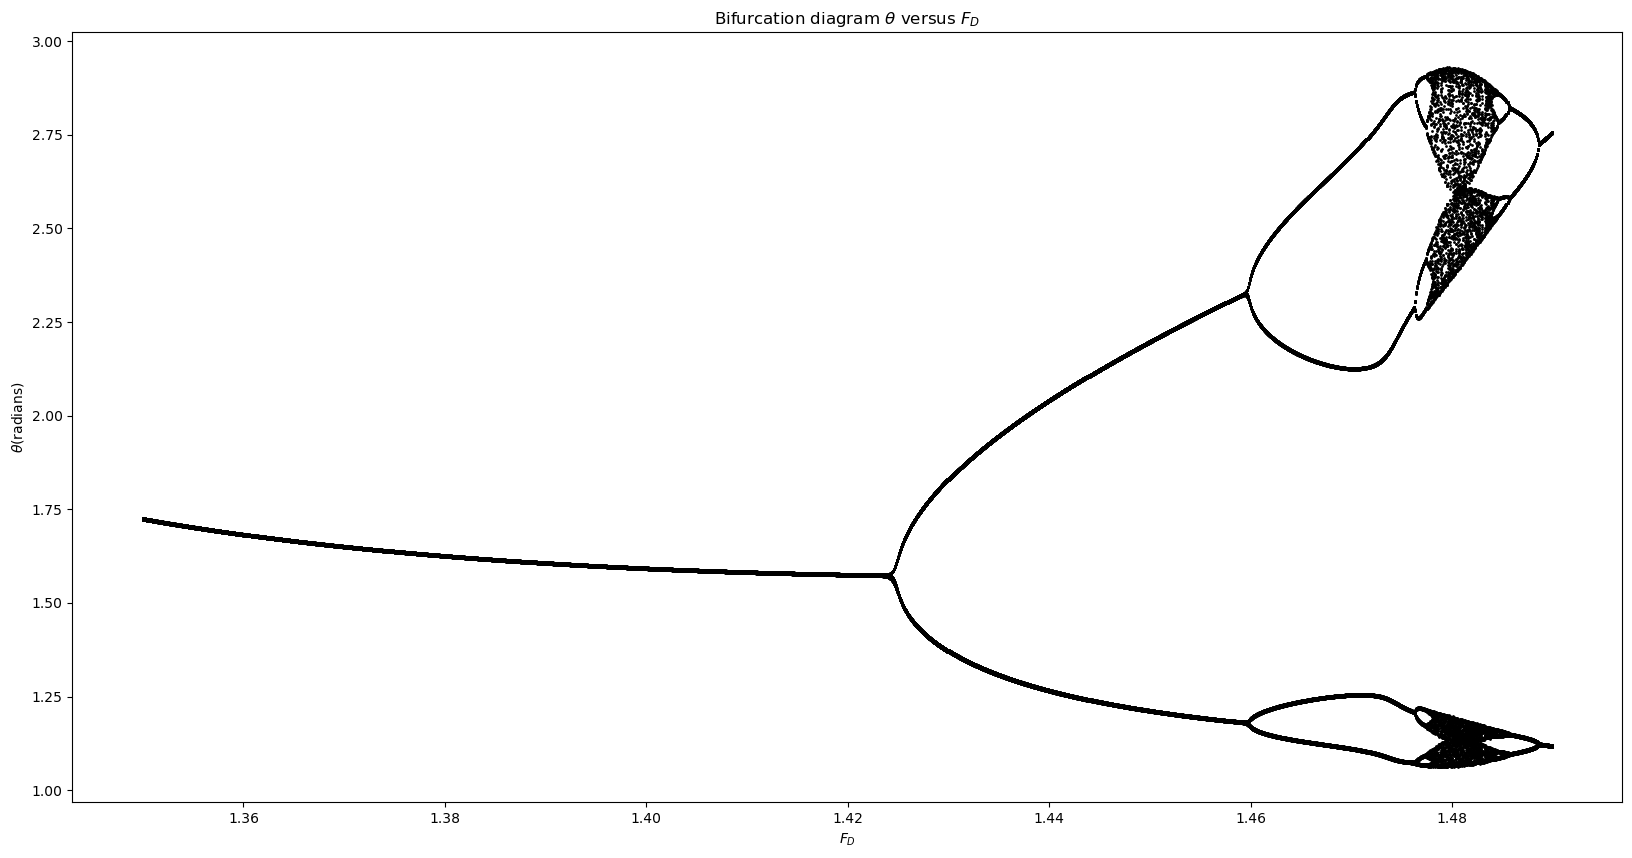

In [98]:
def normalize_theta(theta):
    theta -= (np.trunc(theta/(2*np.pi)))*(2*np.pi)
    condition = np.abs(theta) > np.pi
    indices = np.where(condition)
    theta[indices] -= 2 * np.pi * np.sign(theta[indices])
    return theta

# result = ci_py(sindex, eindex, period_index, max_steps, length, q, OmegaD, g, dt, theta, omega, t, FD)

result = pd.read_csv('result.csv').values.T[1:-1]
result = normalize_theta(result)

fig, ax = plt.subplots(figsize = (20, 10))
for fd,ys in zip(FD[:-200], result):
    fd = np.repeat(fd, ys.size)
    ax.scatter(x=fd, y=ys, color='black', s = 1)

ax.set_title(r'Bifurcation diagram $\theta$ versus $F_D$')
ax.set_xlabel(r'$F_D$')
ax.set_ylabel(r'$\theta$(radians)')
plt.show()

## 计算$\delta$.

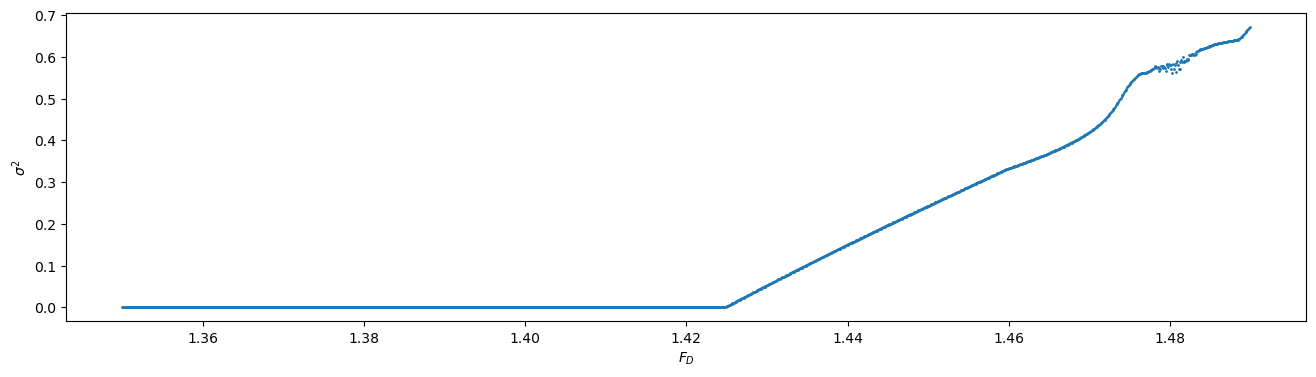

In [115]:
var = 0
deltafs = [] 
for fd,ys in zip(FD[:-200], result):
    var = np.var(ys)
    deltafs.append(var)
plt.figure(figsize=(16,4))
plt.scatter(x=FD[:-200], y=deltafs, s=1)
plt.xlabel(r'$F_D$')
plt.ylabel(r'$\sigma ^2$')
plt.show()

In [119]:
delta = (1.4591 - 1.4244)/ (1.4768 -1.4591)
print(delta)

1.9604519774011464


$F_D = 1.35 -1.5$完整图像

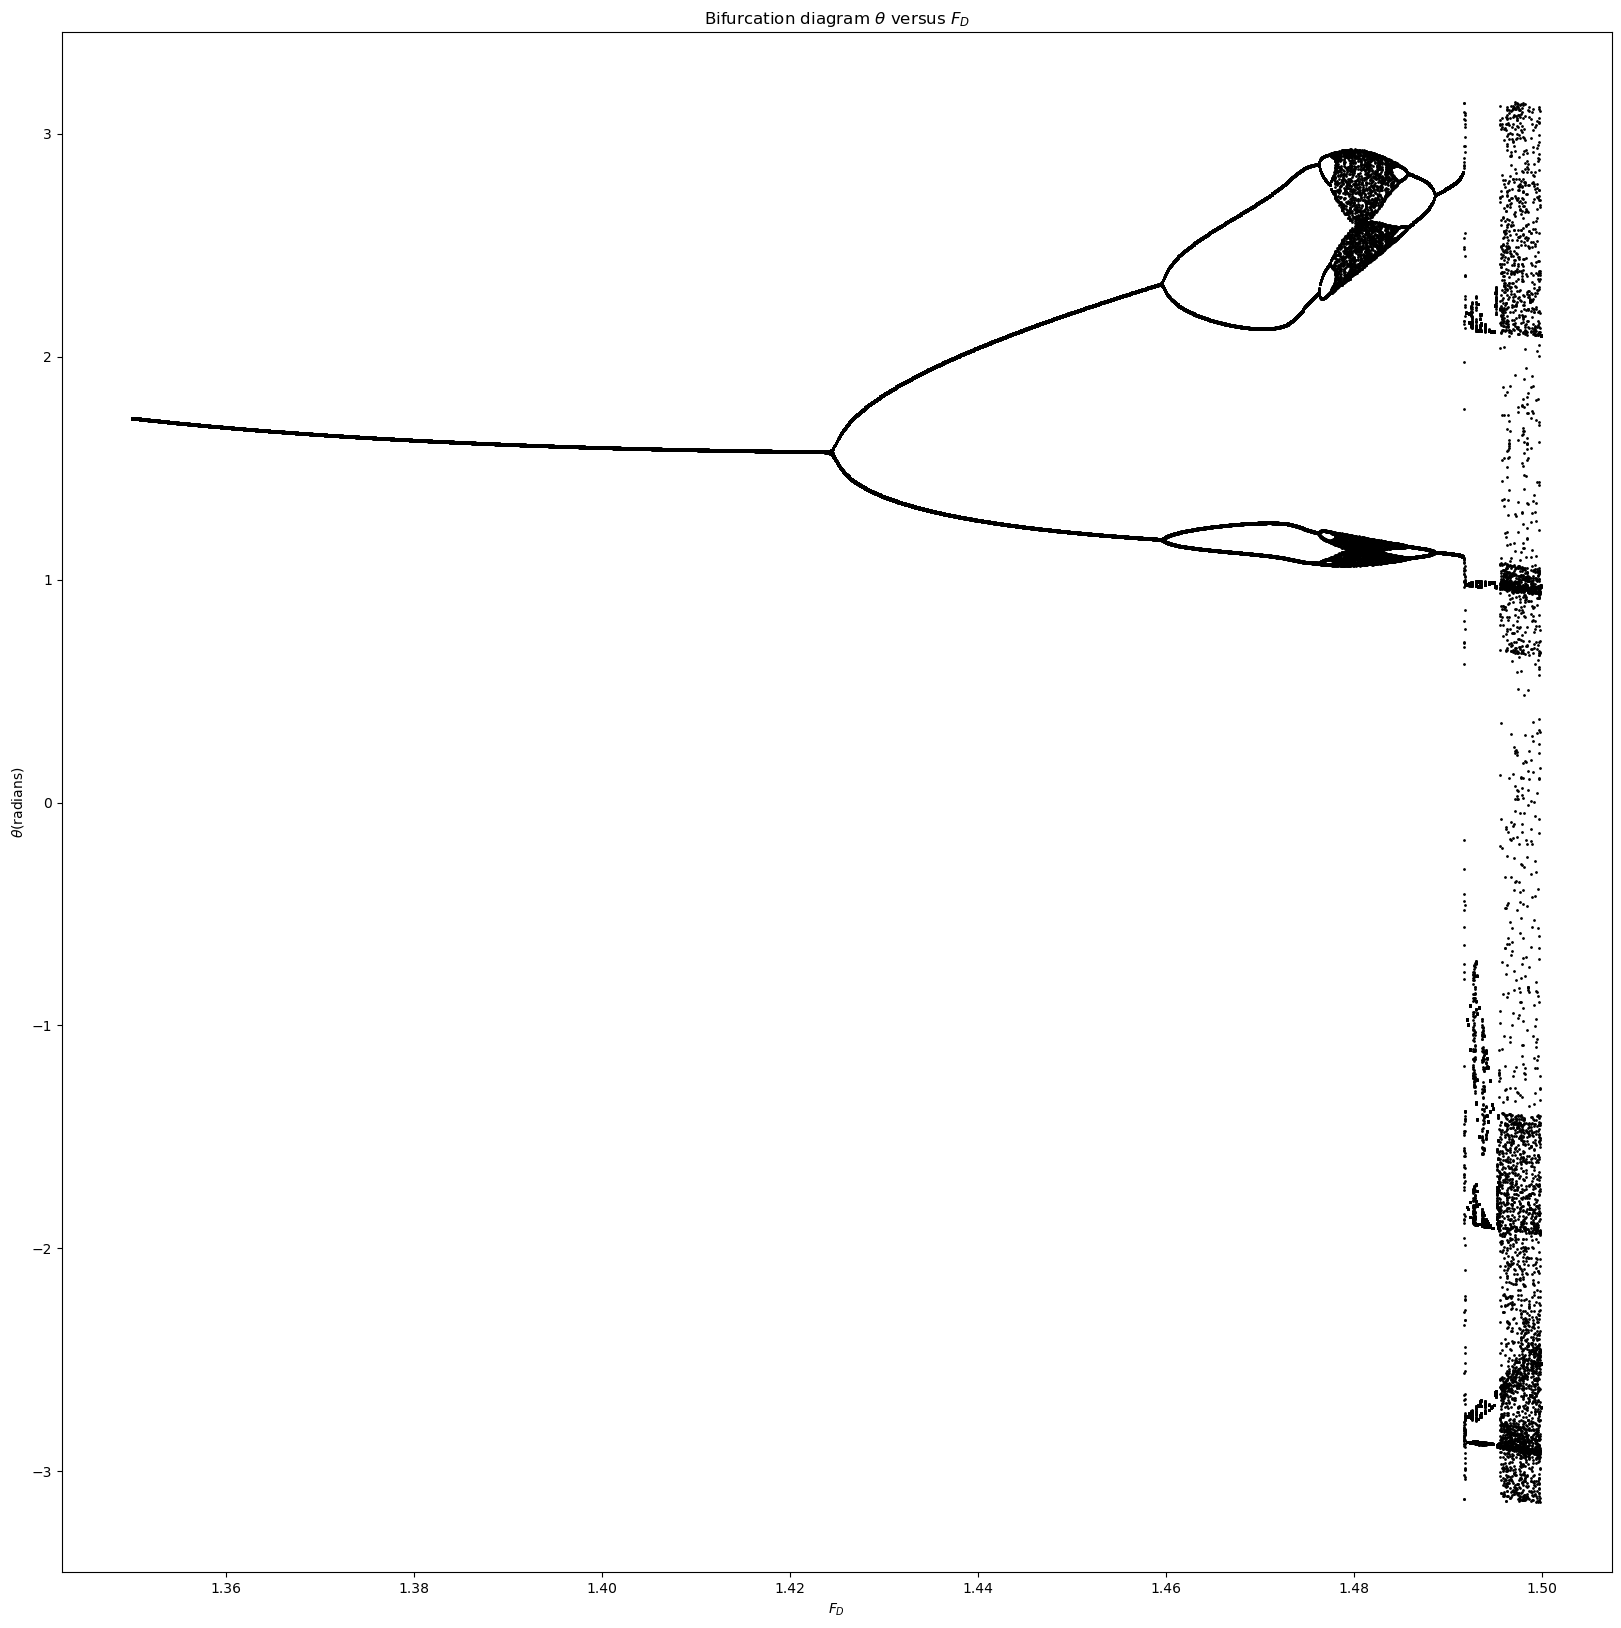

In [97]:
fig, ax = plt.subplots(figsize = (20, 20))
for fd,ys in zip(FD, result):
    fd = np.repeat(fd, ys.size)
    ax.scatter(x=fd, y=ys, color='black', s = 1)

ax.set_title(r'Bifurcation diagram $\theta$ versus $F_D$')
ax.set_xlabel(r'$F_D$')
ax.set_ylabel(r'$\theta$(radians)')
plt.show()

cpp代码如下：

```c++
#include <cstdio>
#include <cmath>
#include <cstring>
#define max_steps 50000000
#define _USE_MATH_DEFINES

using namespace std;

void write_to_csv(int rows, double result[][100]) {
    FILE *file = fopen("result.csv", "w+");
    if (file == NULL) {
        printf("Failed to open file.\n");
        return;
    }

    fprintf(file, ",");
    for (int row = 0; row < rows; row++) {
        fprintf(file, "R%d,", row+1);
    }
    fprintf(file, "\n");

    for (int col = 0; col < 100; col++) {
        fprintf(file, "C%d,", col+1); 
        for (int row = 0; row < rows; row++) {
            fprintf(file, "%lf,", result[row][col]); 
        }
        fprintf(file, "\n");
    }

    fclose(file); 
}


double dt = 0.0001;
double t[max_steps + 5], theta[max_steps + 5], omega[max_steps + 5];
int main()
{
    double g = 9.8, length = 9.8, theta0 = 0.2, omega0 = 0, q = 0.5, FDs = 1.35, FDe = 1.5, FDeps = 0.0001, OmegaD =  0.66667, period, times, timee;
    int nsth = 300, neth = 400, period_index, sindex, eindex, i = 0, j = 0, k = 0,  FDn = int((FDe-FDs)/FDeps + 1);

    double result[FDn][100];
    memset(result, 0, sizeof(result));

    period = (2 * M_PI) / OmegaD;
    period_index = int(period/dt);
    times = (nsth - 1) * period;
    timee = (neth - 1) * period;
    sindex = int(times/dt);
    eindex = int(timee/dt) + 1;

    theta[0] = theta0;
    omega[0] = omega0;
    t[0] = 0.0;

    for (; FDs <= FDe; FDs+=FDeps)
    {
        k = 0;
        for(i = 0; i<max_steps; i++)
        {
            omega[i + 1] = omega[i] - (g/length) * sin(theta[i]) * dt - q*omega[i]*dt + FDs*sin(OmegaD*t[i])*dt;
            theta[i + 1] = theta[i] + omega[i]*dt;
            t[i + 1] = t[i] + dt;
            if (i > sindex && i < eindex)
                if (i % period_index == 0)
                    result[j][k++] = theta[i];
        }
        j++;
    }
    write_to_csv(FDn, result);
    printf("Output completed!\n");
    getchar();
    return 0;
}

```

